# Description


Fake news detection model using DNN make use of a dataset from kagglean online dataset repository. the dataset consisted of two sub dataset 
which are the raining dataset and the testing dataset. the training dataset consit of 7613 rows of data whic is like 70% of the whole dataset
and testing dataset of 3263 rows which form about 30% of the wole dataset. The trainig dataset has five column while the testing dataset has only four column.
The target column is denoted with 0 and 1 which indicate real and fake respectively.

### Import Necessary Libraries

This import handles libraries for data manipulation such as numpy and pandas, natural langugae toolkit (NLTK)
sklearn libraries for model development, datavisualization libraries and data cleaning libraries

In [1]:
import numpy as np
import pandas as pd 
import re
from gensim.parsing.preprocessing import remove_stopwords



E:\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
from nltk.stem import WordNetLemmatizer

In [4]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

### Load the Dataset

The dataset is in two forms, the traaining and the testing testing dataset. each of these dataset 
has to be loaded into the into the workbook. it is loaded below and a sample of it is viewed.

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
df_train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df_test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### Exploratory Data Analysis 
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

In [8]:
df_train.shape

(7613, 5)

In [9]:
df_test.shape

(3263, 4)

Check the details of both the testing data and the training data 

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


Exploring the number of missing data from the dataset

In [12]:
np.sum(df_train.isnull().any(axis=1))

2533

In [13]:
df_train.isnull()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


### Visualizing using bar chart
Showing the relationship between fake news and real news in the dataset. fake news are denoted with 1 and fake news are denoted with 0. Sample of the relationship is viewed using a bar chart

In [39]:
df_train['location'].value_counts(dropna=False)

NaN                               2533
USA                                104
New York                            71
United States                       50
London                              45
                                  ... 
Bleak House                          1
17-Feb                               1
Philadelphia, Pennsylvania USA       1
1/3 of the blam squad                1
CA, AZ & NV                          1
Name: location, Length: 3342, dtype: int64

In [40]:
df_test['location'].value_counts(dropna=False)

NaN                    1105
New York                 38
USA                      37
Worldwide                16
United States            15
                       ... 
#BlackLivesMatter         1
MS                        1
Mansfield, Ohio           1
All Round The World       1
world                     1
Name: location, Length: 1603, dtype: int64

In [33]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

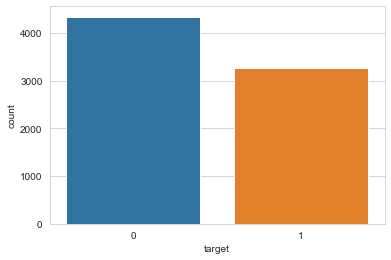

In [34]:
target = df_train['target']
sns.set_style('whitegrid')
sns.countplot(target)

### Showing the content of text column

In [16]:
df_train["text"].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

In [ ]:
df_train["text"]

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


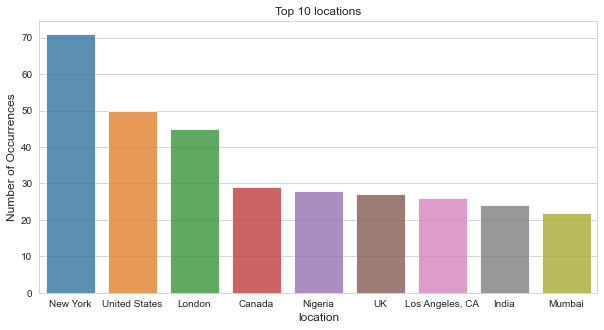

In [38]:
location_count  = df_train['location'].value_counts()
location_count = location_count[1:10]
plt.figure(figsize=(10,5))
sns.barplot(location_count.index, location_count.values, alpha=0.8)
plt.title('Top 10 locations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('location', fontsize=12)
plt.show()

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


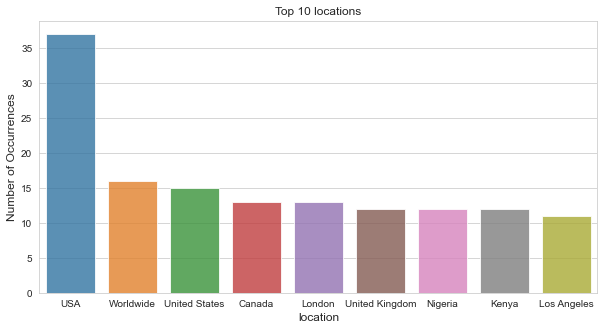

In [36]:
location_count  = df_test['location'].value_counts()
location_count = location_count[1:10]
plt.figure(figsize=(10,5))
sns.barplot(location_count.index, location_count.values, alpha=0.8)
plt.title('Top 10 locations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('location', fontsize=12)
plt.show()

### Converting all the text to small letters
All text in the dataset has to be converted into small letter.

In [19]:
df_train['text']=df_train['text'].str.lower()
df_train['text'].tail()

7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, dtype: object

### Defining set containing English stopwords
Calling a list of english stopwords. this has to be removed dfrom the dataset

In [20]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre", "youve", 'your', 'yours', 'yourself', 'yourselves']

### Cleaning and removing the stop words in both dataset (i.e training nd testing dataset)

In [21]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_train['text'] = df_train['text'].apply(lambda text: cleaning_stopwords(text))
df_train['text'].head()

0        deeds reason #earthquake may allah forgive us
1               forest fire near la ronge sask. canada
2    residents asked 'shelter place' notified offic...
3    13,000 people receive #wildfires evacuation or...
4    got sent photo ruby #alaska smoke #wildfires p...
Name: text, dtype: object

In [22]:
df_test['text'] = df_test['text'].apply(lambda text: cleaning_stopwords(text))
df_test['text'].head()

0                     Just happened terrible car crash
1    Heard #earthquake different cities, stay safe ...
2    forest fire spot pond, geese fleeing across st...
3             Apocalypse lighting. #Spokane #wildfires
4               Typhoon Soudelor kills 28 China Taiwan
Name: text, dtype: object

### Removing punctuations

In [23]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [24]:
df_train['text']= df_train['text'].apply(lambda x: cleaning_punctuations(x))
df_train['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [25]:
df_test['text']= df_test['text'].apply(lambda x: cleaning_punctuations(x))
df_test['text'].head()

0                     Just happened terrible car crash
1    Heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                Apocalypse lighting Spokane wildfires
4               Typhoon Soudelor kills 28 China Taiwan
Name: text, dtype: object

### Cleaning and removing repeating characters

In [26]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [27]:
df_train['text'] = df_train['text'].apply(lambda x: cleaning_repeating_char(x))
df_train['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [28]:
df_test['text'] = df_test['text'].apply(lambda x: cleaning_repeating_char(x))
df_test['text'].head()

0                     Just happened terrible car crash
1    Heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                Apocalypse lighting Spokane wildfires
4               Typhoon Soudelor kills 28 China Taiwan
Name: text, dtype: object

### Removing URL’s

In [29]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [30]:
df_train['text'] = df_train['text'].apply(lambda x: cleaning_URLs(x))
df_train['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [31]:
df_test['text'] = df_test['text'].apply(lambda x: cleaning_URLs(x))
df_test['text'].head()

0                     Just happened terrible car crash
1    Heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                Apocalypse lighting Spokane wildfires
4               Typhoon Soudelor kills 28 China Taiwan
Name: text, dtype: object

### Removing Numeric entities

In [32]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [33]:
df_train['text'] = df_train['text'].apply(lambda x: cleaning_numbers(x))
df_train['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3     people receive wildfires evacuation orders ca...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [34]:
df_test['text'] = df_test['text'].apply(lambda x: cleaning_numbers(x))
df_test['text'].head()

0                     Just happened terrible car crash
1    Heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                Apocalypse lighting Spokane wildfires
4                 Typhoon Soudelor kills  China Taiwan
Name: text, dtype: object

### Tokenization of dataset

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.


In [35]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_train['text']= df_train['text'].apply(lambda x: stemming_on_text(x))
df_train['text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3     people receive wildfires evacuation orders ca...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [36]:
df_test['text']= df_test['text'].apply(lambda x: stemming_on_text(x))
df_test['text'].head()

0                     Just happened terrible car crash
1    Heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                Apocalypse lighting Spokane wildfires
4                 Typhoon Soudelor kills  China Taiwan
Name: text, dtype: object

In [37]:
tweetText = df_train['text']
from nltk.tokenize import word_tokenize

tweetText = tweetText.apply(word_tokenize)
tweetText.head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [38]:
tweetText_test = df_test['text']
from nltk.tokenize import word_tokenize

tweetText_test = tweetText_test.apply(word_tokenize)
tweetText_test.head()

0               [Just, happened, terrible, car, crash]
1    [Heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [Apocalypse, lighting, Spokane, wildfires]
4            [Typhoon, Soudelor, kills, China, Taiwan]
Name: text, dtype: object

### Applying stemmer on the datasets
Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma

In [39]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
tweetText= tweetText.apply(lambda x: stemming_on_text(x))
tweetText.head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [40]:
tweetText_test= tweetText_test.apply(lambda x: stemming_on_text(x))
tweetText_test.head()

0               [Just, happened, terrible, car, crash]
1    [Heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [Apocalypse, lighting, Spokane, wildfires]
4            [Typhoon, Soudelor, kills, China, Taiwan]
Name: text, dtype: object

In [41]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

tweetText= tweetText.apply(lambda x: stemming_on_text(x))
tweetText.head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [42]:
tweetText_test= tweetText_test.apply(lambda x: stemming_on_text(x))
tweetText_test.head()

0               [Just, happened, terrible, car, crash]
1    [Heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [Apocalypse, lighting, Spokane, wildfires]
4            [Typhoon, Soudelor, kills, China, Taiwan]
Name: text, dtype: object

### Lemmatization of datasets
Both in stemming and in lemmatization, we try to reduce a given word to its root word. The root word is called a stem in the stemming process, and it is called a lemma in the lemmatization process. This part complete the words that are not handle with stemming

In [43]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

tweetText =tweetText.apply(lambda x: lemmatizer_on_text(x))
tweetText.head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [44]:
tweetText_test =tweetText_test.apply(lambda x: lemmatizer_on_text(x))
tweetText_test.head()

0               [Just, happened, terrible, car, crash]
1    [Heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [Apocalypse, lighting, Spokane, wildfires]
4            [Typhoon, Soudelor, kills, China, Taiwan]
Name: text, dtype: object

In [45]:
tweetText.head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

### Building word cloud for the datasets
A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

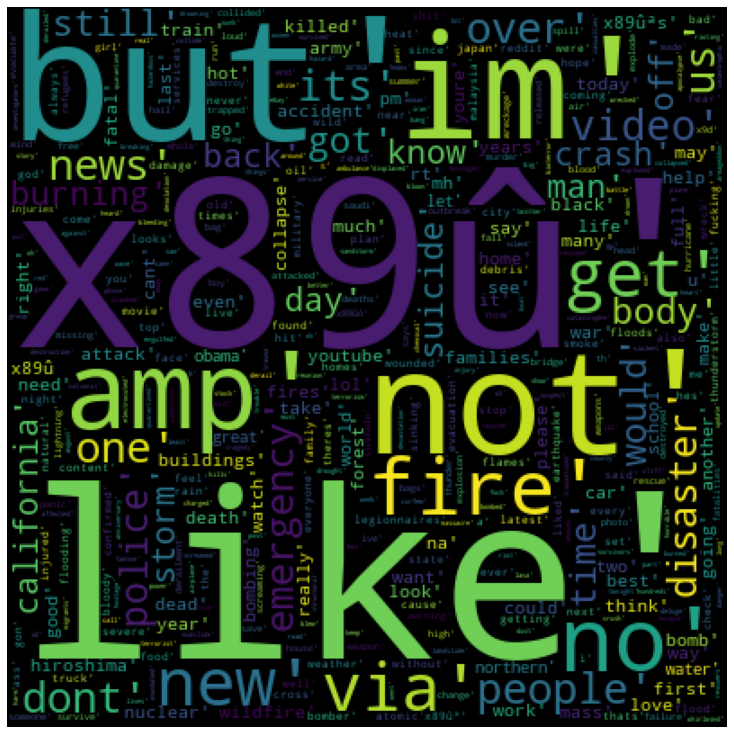

In [91]:
from wordcloud import WordCloud
df_train['text']=tweetText.astype(str)

plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 400 , height = 400,background_color="black", collocations=False).generate(" ".join(df_train['text']))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc)

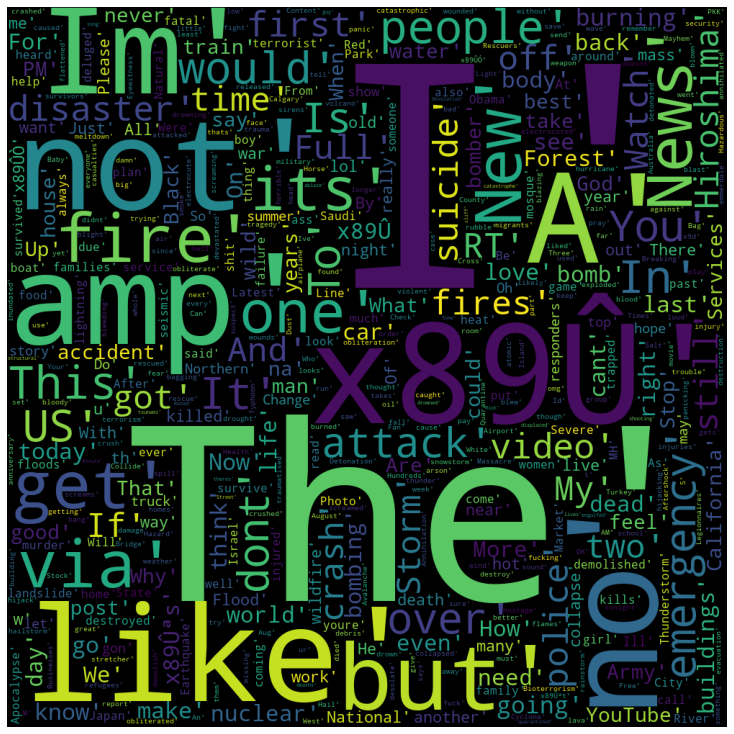

In [93]:
df_test['text']=tweetText_test.astype(str)
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 500 , width = 1000 , height = 1000,background_color="black",
               collocations=False).generate(" ".join(df_test['text']))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc)

In [48]:
X_train=df_train['text']

y_test=df_train.target
X_test =df_test['text']

### Creating a split version of the dataset (Target Variable)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_test,test_size = 0.05, random_state =26105111)

### Vectoriser Transformation 
Word vectorization refers to a set of techniques that aims at extracting information from a text corpus and associating to each one of its word a vector. 

In [50]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  71776


In [51]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

### Build a Model function 

Create a template function for the model

In [52]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
   .
    print(classification_report(y_test, y_pred))
  
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Naive Bayes Model

              precision    recall  f1-score   support

           0       0.71      0.98      0.82       220
           1       0.95      0.45      0.61       161

    accuracy                           0.76       381
   macro avg       0.83      0.72      0.72       381
weighted avg       0.81      0.76      0.74       381



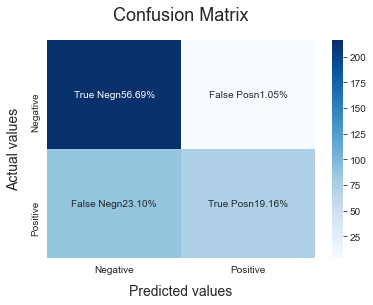

In [53]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

### Naive Bayes Model ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
True Positive Rate and False Positive Rate


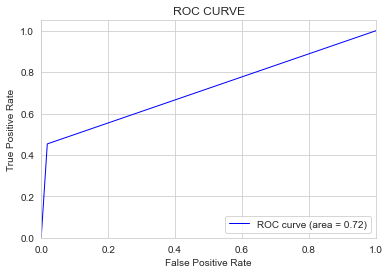

In [54]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machine 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       220
           1       0.79      0.75      0.77       161

    accuracy                           0.81       381
   macro avg       0.81      0.80      0.80       381
weighted avg       0.81      0.81      0.81       381



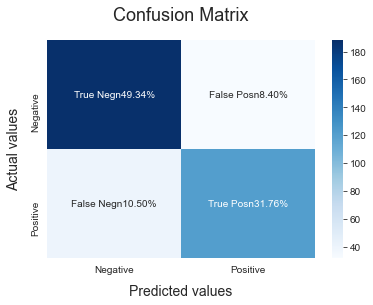

In [55]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

### Support vector machine Model ROC curve

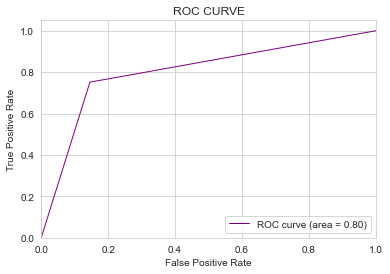

In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Logistic regression model 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       220
           1       0.84      0.73      0.78       161

    accuracy                           0.83       381
   macro avg       0.83      0.82      0.82       381
weighted avg       0.83      0.83      0.83       381



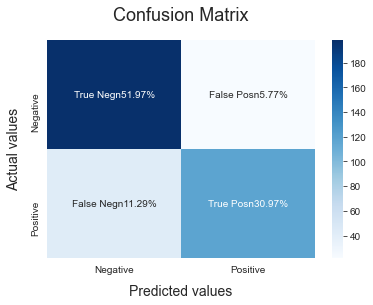

In [57]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

### logistic regression model ROC 

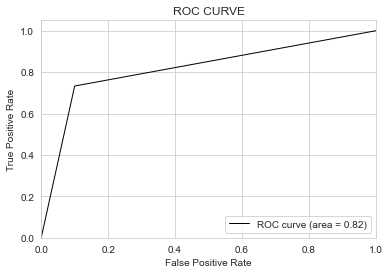

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='black', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Deep Neural Network Model 

Basic import for the DNN libraries

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout
from keras import regularizers

In [60]:
import gensim

E:\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Build the Network

This stage include the creating of the Layers, neurons and the nodes that 
comprises of the network. Also the network optimization is also handled at this stage with the use of dropout and regularizer. 
This check and handle networking overfitting or underfiting. Activation function on each layer are specified here  

In [112]:

model = Sequential()
model.add(Dense(512,input_dim = X_train.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))


model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
kernel_regularizer=regularizers.l2(0.01)
model.add(Dense(512,activation="relu"))

model.add(Dense(1,activation = "sigmoid")) 



"\ndef tensorflow_based_model(): \n    inputs = Input(name='inputs',shape=[max_len])#step1\n    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2\n    layer = LSTM(64)(layer) #step3\n    layer = Dense(256,name='FC1')(layer) #step4\n    layer = Activation('relu')(layer) # step5\n    layer = Dropout(0.5)(layer) # step6\n    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative\n    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.\n    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification\n    return model #function returning the value when we call it\n    "

### Network Summary

This is a table-like image which display the details of the network. it shows the details of each layer

In [114]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               36749824  
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_33 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_36 (Dense)             (None, 1)                

Compiling the model after it has been built successfully

In [115]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [123]:
X_train = X_train.toarray()

Checking the performance of the network on the training data and also showing the accuracy. Here ten epoch is used meaning that the data is fed into the network in 10 batches 

In [118]:
model.fit(X_train,y_train,batch_size=80,epochs=10, shuffle = True)#, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/10
91/91 [==============================] - 42s 384ms/step - loss: 0.0103 - accuracy: 0.9953
Epoch 2/10
91/91 [==============================] - 35s 384ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 3/10
91/91 [==============================] - 36s 395ms/step - loss: 0.0106 - accuracy: 0.9954
Epoch 4/10
91/91 [==============================] - 36s 395ms/step - loss: 0.0122 - accuracy: 0.9954
Epoch 5/10
91/91 [==============================] - 36s 396ms/step - loss: 0.0083 - accuracy: 0.9956
Epoch 6/10
91/91 [==============================] - 36s 394ms/step - loss: 0.0079 - accuracy: 0.9959
Epoch 7/10
91/91 [==============================] - 36s 395ms/step - loss: 0.0078 - accuracy: 0.9959
Epoch 8/10
91/91 [==============================] - 36s 399ms/step - loss: 0.0079 - accuracy: 0.9959
Epoch 9/10
91/91 [==============================] - 36s 398ms/step - loss: 0.0075 - accuracy: 0.9959
Epoch 10/10
91/91 [==============================] - 36s 395ms/step - loss: 0.0075 - accura

From the above result, it was observed that the model had a 99% accuracy on the training data which is a good learning rate

In [79]:
X_test= X_test.toarray()

In [80]:
y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, classification_report

In [84]:
y_test= np.array(y_test)

##### Getting predictions on the trained model

In [88]:
y_pred = model.predict(X_test) 
y_pred = (y_pred > 0.5)

In [105]:
result = model.evaluate(X_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i]*100,2)))

12/12 [==============================] - 1s 72ms/step - loss: 1.3296 - accuracy: 0.7927
Metric  loss : 132.96
Metric  accuracy : 79.27
